# **Importing** **libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Importing** **data**

In [2]:
df=pd.read_csv('Position_Salaries.csv')
X=df.iloc[:, 1:-1].values
y=df.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
#i have reshape the y in 2D array because X is in 2D array and also because i have to apply feature scaling and while applying feature scaling our data should be in 2D array format.
y=y.reshape(len(y),1)

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# **Feature** **Scaling**

It is beneficial to apply feature scaling when there is a implicit relation between the dependent variable(y) and the features(x).

It is a step of Data Pre Processing that is applied to independent variables or features of data. It helps to normalize the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

we cannot apply feature scaling like when dependent variable takes binary values like 0 and 1,and on dummy variables resulting from oneHotEncoding.

whenever you want to split your dataset into the training set and test set,well,you have to apply feature scaling after the split.

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
X=sc_x.fit_transform(X)
y=sc_y.fit_transform(y)

In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# **Training the SVR model on** **the** **whole** **dataset**

I am using Gaussian Kernel Radial Basis Function(RBF)

In [11]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# **Predicting a new result**

choosing 6.5 is basically a level above Region Manager in dataset so that to get a clear insight.

In [13]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

# **Visualizing the SVR results**

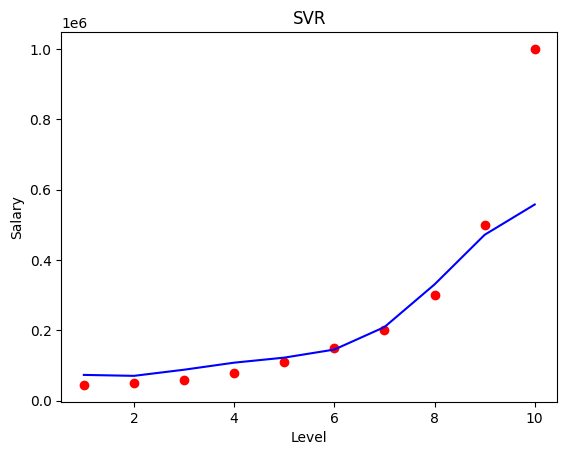

In [16]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')
plt.title('SVR')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# Visualizing the SVR results(for high resolution and smoother curve)

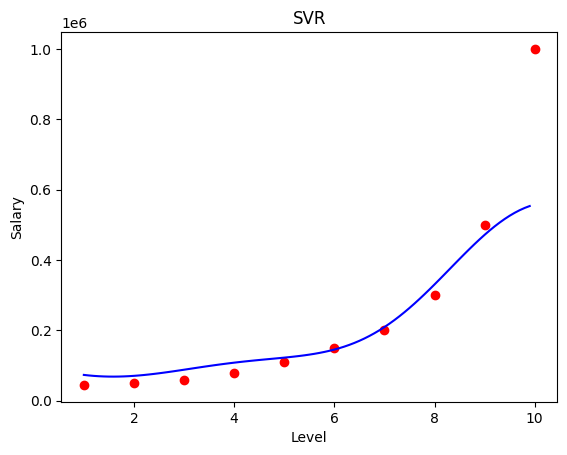

In [20]:
x_grid=np.arange(min(sc_x.inverse_transform(X)),max(sc_x.inverse_transform(X)),0.1)
x_grid=x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)), color='blue')
plt.title('SVR')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()
